# Lecture 2 - Introduction to Social Media Analytics with Python

In this notebook we will learn the basics for analyzing  social media data with Python.  We will study tweets collected by keyword, tweets collected by user, and user profiles.  Some of the skills you will learn include searching and sorting dataframes and making bar and scatter plots.  For more details on the dataframe functions used in this notebook, you can look here: https://pandas.pydata.org/docs/index.html

This notebook can be opened in Colab 
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zlisto/social_media_analytics/blob/main/Lecture02_BasicSocialMediaDataAnalysis.ipynb)

Before starting, select "Runtime->Factory reset runtime" to start with your directories and environment in the base state.

If you want to save changes to the notebook, select "File->Save a copy in Drive" from the top menu in Colab.  This will save the notebook in your Google Drive.



# Clone GitHub Repository
This will clone the repository to your machine.  This includes the code and data files.  Then change into the directory of the repository.

In [ ]:
!git clone https://github.com/zlisto/social_media_analytics

import os
os.chdir("social_media_analytics")

## Install Requirements 



In [1]:
!pip install -r requirements.txt

## Import packages

We import the packages we are going to use.  A package contains several useful functions that make our life easier.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scripts.api import *


#this option makes it so tweets display nicely in a dataframe
pd.set_option("display.max_colwidth", None)



# Keyword Tweets

We begin with a set of tweets that contain a specific hashtag.  These were found using Twitter's Search API.  The tweets were saved in a table in a database file.  The filename of the database is stored in the variable `fname_db`.  The table's name is `"keyword_tweets"`.  Each row
of this table is a tweet with many columns of information.  The most important columns are "created_at,screen_name,text".  





### Load Keyword Tweets
We load the tweets from the database using the `DB.fetch` function. The tweets are loaded into a variable called **df** which is a *dataframe*.  Dataframes store each tweet as a row and let us access the rows and columns easily.  We will use dataframes a lot.

In [2]:
#filename of database
fname_db = "data/lecture_02"  #database filenmae

df = DB.fetch(table_name='keyword_tweets', path=fname_db)


### Look at the tweets using head() function
After we load the tweets in **df**, we look at the first few tweets using the *head* function.  We can specify how many rows to show using the *n* parameter.



In [3]:
df.head(n=2)

,created_at,screen_name,text,lang,retweet_count,reply_count,like_count,quote_count,id,author_id,conversation_id,in_reply_to_user_id,geo,entities
0,2022-01-07T23:58:24.000Z,DoraineGenius,Hong Kong NFT start-ups jockey to become the next Bored Apes and CryptoPunks in an increasingly crowded field\n@luckykittensnft #Metaverse #BoredApeYachtClub #NewNFT\n\n#Ethereum #bitcoin\n#cryptonews #NFTnews #NFTs #NFTartists #nftcollector #nftgallery #NFTs #cryptoart #Cryptos https://t.co/b0maPJirBV,en,1,0,4,0,1479603356083658753,1308840519234138114,1479603356083658753,nan,nan,"{'urls': [{'start': 276, 'end': 299, 'url': 'https://t.co/b0maPJirBV', 'expanded_url': 'https://twitter.com/DoraineGenius/status/1479603356083658753/photo/1', 'display_url': 'pic.twitter.com/b0maPJirBV'}], 'hashtags': [{'start': 127, 'end': 137, 'tag': 'Metaverse'}, {'start': 138, 'end': 156, 'tag': 'BoredApeYachtClub'}, {'start': 157, 'end': 164, 'tag': 'NewNFT'}, {'start': 166, 'end': 175, 'tag': 'Ethereum'}, {'start': 176, 'end': 184, 'tag': 'bitcoin'}, {'start': 185, 'end': 196, 'tag': 'cryptonews'}, {'start': 197, 'end': 205, 'tag': 'NFTnews'}, {'start': 206, 'end': 211, 'tag': 'NFTs'}, {'start': 212, 'end': 223, 'tag': 'NFTartists'}, {'start': 224, 'end': 237, 'tag': 'nftcollector'}, {'start': 238, 'end': 249, 'tag': 'nftgallery'}, {'start': 250, 'end': 255, 'tag': 'NFTs'}, {'start': 256, 'end': 266, 'tag': 'cryptoart'}, {'start': 267, 'end': 275, 'tag': 'Cryptos'}], 'mentions': [{'start': 110, 'end': 126, 'username': 'luckykittensnft', 'id': '1449251281848213505'}]}"
1,2022-01-07T23:54:41.000Z,MrLegendaryAPE,"I think head bands in @BoredApeYC are super under valued.\n\nI'm not sure if anyone realizes this.\nBut the head band says\n (""Godly Winds"")\n\nIf that's not cool I don't know what is.\n\nRandom? Or purposeful?\n\n@BoredApeYC\n#MAYC #BAYC\n#BoredApeYachtClub #BoredApeYC #MutantApeYachtClub https://t.co/e3NWZZAgyN",en,0,5,9,0,1479602421311553536,1424343723563913223,1479602421311553536,nan,nan,"{'urls': [{'start': 279, 'end': 302, 'url': 'https://t.co/e3NWZZAgyN', 'expanded_url': 'https://twitter.com/MrLegendaryAPE/status/1479602421311553536/photo/1', 'display_url': 'pic.twitter.com/e3NWZZAgyN'}], 'hashtags': [{'start': 216, 'end': 221, 'tag': 'MAYC'}, {'start': 222, 'end': 227, 'tag': 'BAYC'}, {'start': 228, 'end': 246, 'tag': 'BoredApeYachtClub'}, {'start': 247, 'end': 258, 'tag': 'BoredApeYC'}, {'start': 259, 'end': 278, 'tag': 'MutantApeYachtClub'}], 'mentions': [{'start': 22, 'end': 33, 'username': 'BoredApeYC', 'id': '1381699264011771906'}, {'start': 204, 'end': 215, 'username': 'BoredApeYC', 'id': '1381699264011771906'}]}"


### Select Columns of Dataframe

Sometimes we just want to look at a few columns of the dataframe.  We can do this by putting the names of the columns we want into a *list*.  In Python, lists have the format `[item_1,item_2,...,item_n]`.  

In [4]:
col = ['screen_name','text']
df[ col].head(n=12)

,screen_name,text
0,DoraineGenius,Hong Kong NFT start-ups jockey to become the next Bored Apes and CryptoPunks in an increasingly crowded field\n@luckykittensnft #Metaverse #BoredApeYachtClub #NewNFT\n\n#Ethereum #bitcoin\n#cryptonews #NFTnews #NFTs #NFTartists #nftcollector #nftgallery #NFTs #cryptoart #Cryptos https://t.co/b0maPJirBV
1,MrLegendaryAPE,"I think head bands in @BoredApeYC are super under valued.\n\nI'm not sure if anyone realizes this.\nBut the head band says\n (""Godly Winds"")\n\nIf that's not cool I don't know what is.\n\nRandom? Or purposeful?\n\n@BoredApeYC\n#MAYC #BAYC\n#BoredApeYachtClub #BoredApeYC #MutantApeYachtClub https://t.co/e3NWZZAgyN"
2,ke1lerr,"This was me until I met the @_cryptoapes family now I'm out here spending 7 hours straight with them chattin and crapeing on spaces! #BoredApeYachtClub and #cryptopunks communities have been successfully united already, many more to come :) #CRAPES https://t.co/O9pdAwoRZm"
3,InfiniteDodos,First community AMA announcing 4 functional DAOS at mint was exciting!! \n\nDiscord is open 🔓\n\nhttps://t.co/Nf7EhfJyYj\n\nMore announced soon! \n\n#NFT #opensea #NFTGiveaway #eth #DAO #BoredApeYachtClub
4,__jiri,Cryptos are down but #NFTs are up! Are you selling for a profit or holding?\n\n#LazyLionsNFT #BAYC #boredapeyachtclub #CyberKongz #Cryptopunks #Fidenza #veefriends #NFTCollector #NFTNews #nftcommunity #cryptonft #nftcollector #NFTart #cryptoart https://t.co/UaZOaFx5Xv
5,nft_tracker,Sold! Bored Ape was purchased by sadsigns_vault for Ξ69.0 ($222k) $ETH #NFT #NFTs #art #cryptoart @BoredApeYC #BAYC #BoredApeYachtClub https://t.co/PS0eTxJUj1
6,kxngoftheether,𝕿𝖍𝖊 𝕶𝖝𝖓𝖌 𝖔𝖋 𝖙𝖍𝖊 𝕰𝖙𝖍𝖊𝖗 𝖍𝖆𝖘 𝖗𝖎𝖘𝖊𝖓!!!\n#nft #nfts #nftart #nftcollector #cryptoart #ethereum #polygon #blockchain #Solana #boredapeyachtclub #cryptopunks #nftcommunity #rarible #opensea #nftcollectibles #digitalart #mint #minting #discord #ipfs #erc721 https://t.co/fM0c4oRbX0
7,metaverseunited,"🌴NEW Rare Bored Apes Minted NOW!🦧\n🔥SELLING FAST🔥\n🚀Get in NOW,take advantage of the Floor Price\n\nOpensea: https://t.co/6QS6MbHtyU\n\n#NFTCommmunity #NFTGiveaway #NFTdrop #NFTartists #nftcollectors #Metaverse #crypto #Bitcoin #Ethereum #opensea #BoredApeYachtClub #APENFT https://t.co/vtVBYdt199"
8,thehightablenft,One Lucky Person That Mints A HighTable NFT Will Be Awarded 1 Pound Of Top Shelf Flowers 🔥💨 + All NFT Holders Will Be Granted 1 Quater Of Top Shelf Flowers Every Two Weeks ! #nft #NFTs #NFTCommunity #NFTGame #nftcollectors #opensea #BoredApeYachtClub #NFTdrop #NFTCollection https://t.co/ltH52FH5L7
9,DavillinNFTs,MINTING YOUR NFTs\n\nhttps://t.co/T5YZLKo8rR\n\n#NFTs #NFTCommunity #NFTGame #NFTdrop #NFTGiveaways #cryptopunks #BoredApeYachtClub #cryptocurrency #Twitter #ETH #Ethereum


### Sample Rows of Dataframe

The `head` function will give the first few rows of the dataframe.  We can use the `sample` function to randomly sample a fixed number of rows.

In [5]:
df[ ['screen_name','text']].sample(n=2)

,screen_name,text
4239,Robert_Vandal_,@KrayApe I made a remix of Mega Mutant that \n@TaylorGerring\n\n owns.\nGRIM RE APE R\n6.66$eth price\n1/1\nhttps://t.co/8ogTwzhjwB… \n@opensea\n \n#nftcollector #nft #nftart #NFTCommunity #nftshill #nftcollection #MutantApeYachtClub #MutantFam #MegaMutant #MAYC #BAYC #BoredApe #BoredApeYachtClub https://t.co/KpChXIJ5k4
1284,AbstractApeYC,Some recent #Ape happenings:\n#bayc #boredapeyachtclub #boredape #boredapeyc #nfts #nft #nftcollector #NFTCommunity #NFTcollectibles #NFTcollectible #NFTcollectables #nftcollectors #NFTartists #nftart\nhttps://t.co/sYl6nVC5eg


### Search for Tweets Containing Keywords

We can search for tweets in the dataframe which contains a specific keyword.  We do this with the `contains` function.  This function takes the keyword as input in the form of a string (this means you put the word inside quotes).  It also has a parameter `case` which is `True` if you want to match the case of the keyword.



In [6]:
keyword = 'eminem'

df[df.text.str.contains(keyword, case = False)][['screen_name','text']].sample(n=5)


,screen_name,text
3596,Sthorium_,"Famous rapper Eminem bought the number 9055 from the ""Bored Ape Yacht Club"" NFT collection for $450K (123.45 ETH) and made it her Twitter profile picture.\n\n@BoredApeYC \n#NFT #NFTCommunity #BoredApeYachtClub https://t.co/ijsBjNjVRN"
1003,AnunayAryan1,Most Exclusive Skull https://t.co/fw8fudHd24 @Eminem @justinbieber @Coinbase_NFT @NearNFTIndia @NFTCommunityy #NFT #NFTCommunity #NFTGiveaway #1ETH #BoredApeYachtClub #ApesTogetherStrong #NFTdrop #OpenSeaNFT #opensea #nftart #manishmalhotra #Instagram
716,KryptoMillionss,@Eminem You ever loved an NFT so much you'd give an arm for? I Love the new NFT! Check out @ApeTradersNFT @opensea #NFTs #NFT are the #future #Eminem #Shady #BoredApeYachtClub @nftgallery_art @Coinbase_NFT #Metaverse #APES #BoredApeYachtClub #Ethereum #HBARNFT #AVAX #crypto https://t.co/IFaOEUes8V
2974,nobleboy4444,"@pixelpartynft Eminem bought this Bored Ape Yacht Club #NFT for 123 $ETH (~470,000 USD)!\n\nHow much would #ApeFund NFTs sell for? 🤔\n@ApeFundOfficial #ApeTank \nStay tuned for more updates on the Ape Fund NFTs \n\n#Crypto #BAYC #APENFT #BoredApeYachtClub #bsc https://t.co/22oPIAK1HO"
4762,Mutant_Mal,@MLGDan23 @thatguygeo @BoredApeYC @Eminem @JesseGrushack @sixweb3 that’s a lot of losers! 😂 #TribeQuokka #MAYC #BAYC #RivalNFTs #TribeQvsBAYC #TQvsBAYC #BoredApeYachtClub #NFT #NFTs #NFTCommunity @TribeQuokka @BoredApeYC


### Add Column to Dataframe

We can add a column to the dataframe to make data analysis easier.  Let's add a column called `"has_eminem"` which is `True` if the tweet has the word "eminem".  This can be done by doing `df["has_eminem"] = column you want to add`.  In our case, the column we want to add is given by `df.text.str.contains(keyword, case = False)`. 


In [7]:
keyword = 'eminem'

df['has_eminem'] = df.text.str.contains(keyword, case = False)
df.head()

,created_at,screen_name,text,lang,retweet_count,reply_count,like_count,quote_count,id,author_id,conversation_id,in_reply_to_user_id,geo,entities,has_eminem,ratio
0,2022-01-07T23:58:24.000Z,DoraineGenius,Hong Kong NFT start-ups jockey to become the next Bored Apes and CryptoPunks in an increasingly crowded field\n@luckykittensnft #Metaverse #BoredApeYachtClub #NewNFT\n\n#Ethereum #bitcoin\n#cryptonews #NFTnews #NFTs #NFTartists #nftcollector #nftgallery #NFTs #cryptoart #Cryptos https://t.co/b0maPJirBV,en,1,0,4,0,1479603356083658753,1308840519234138114,1479603356083658753,nan,nan,"{'urls': [{'start': 276, 'end': 299, 'url': 'https://t.co/b0maPJirBV', 'expanded_url': 'https://twitter.com/DoraineGenius/status/1479603356083658753/photo/1', 'display_url': 'pic.twitter.com/b0maPJirBV'}], 'hashtags': [{'start': 127, 'end': 137, 'tag': 'Metaverse'}, {'start': 138, 'end': 156, 'tag': 'BoredApeYachtClub'}, {'start': 157, 'end': 164, 'tag': 'NewNFT'}, {'start': 166, 'end': 175, 'tag': 'Ethereum'}, {'start': 176, 'end': 184, 'tag': 'bitcoin'}, {'start': 185, 'end': 196, 'tag': 'cryptonews'}, {'start': 197, 'end': 205, 'tag': 'NFTnews'}, {'start': 206, 'end': 211, 'tag': 'NFTs'}, {'start': 212, 'end': 223, 'tag': 'NFTartists'}, {'start': 224, 'end': 237, 'tag': 'nftcollector'}, {'start': 238, 'end': 249, 'tag': 'nftgallery'}, {'start': 250, 'end': 255, 'tag': 'NFTs'}, {'start': 256, 'end': 266, 'tag': 'cryptoart'}, {'start': 267, 'end': 275, 'tag': 'Cryptos'}], 'mentions': [{'start': 110, 'end': 126, 'username': 'luckykittensnft', 'id': '1449251281848213505'}]}",False,0.000000
1,2022-01-07T23:54:41.000Z,MrLegendaryAPE,"I think head bands in @BoredApeYC are super under valued.\n\nI'm not sure if anyone realizes this.\nBut the head band says\n (""Godly Winds"")\n\nIf that's not cool I don't know what is.\n\nRandom? Or purposeful?\n\n@BoredApeYC\n#MAYC #BAYC\n#BoredApeYachtClub #BoredApeYC #MutantApeYachtClub https://t.co/e3NWZZAgyN",en,0,5,9,0,1479602421311553536,1424343723563913223,1479602421311553536,nan,nan,"{'urls': [{'start': 279, 'end': 302, 'url': 'https://t.co/e3NWZZAgyN', 'expanded_url': 'https://twitter.com/MrLegendaryAPE/status/1479602421311553536/photo/1', 'display_url': 'pic.twitter.com/e3NWZZAgyN'}], 'hashtags': [{'start': 216, 'end': 221, 'tag': 'MAYC'}, {'start': 222, 'end': 227, 'tag': 'BAYC'}, {'start': 228, 'end': 246, 'tag': 'BoredApeYachtClub'}, {'start': 247, 'end': 258, 'tag': 'BoredApeYC'}, {'start': 259, 'end': 278, 'tag': 'MutantApeYachtClub'}], 'mentions': [{'start': 22, 'end': 33, 'username': 'BoredApeYC', 'id': '1381699264011771906'}, {'start': 204, 'end': 215, 'username': 'BoredApeYC', 'id': '1381699264011771906'}]}",False,0.555556
2,2022-01-07T23:51:14.000Z,ke1lerr,"This was me until I met the @_cryptoapes family now I'm out here spending 7 hours straight with them chattin and crapeing on spaces! #BoredApeYachtClub and #cryptopunks communities have been successfully united already, many more to come :) #CRAPES https://t.co/O9pdAwoRZm",en,12,0,27,1,1479601552453029889,2586211981,1479601552453029889,nan,nan,"{'urls': [{'start': 249, 'end': 272, 'url': 'https://t.co/O9pdAwoRZm', 'expanded_url': 'https://twitter.com/ke1lerr/status/1479601552453029889/photo/1', 'display_url': 'pic.twitter.com/O9pdAwoRZm'}], 'hashtags': [{'start': 133, 'end': 151, 'tag': 'BoredApeYachtClub'}, {'start': 156, 'end': 168, 'tag': 'cryptopunks'}, {'start': 241, 'end': 248, 'tag': 'CRAPES'}], 'mentions': [{'start': 28, 'end': 40, 'username': '_cryptoapes', 'id': '1475978040576413700'}]}",False,0.000000
3,2022-01-07T23:47:04.000Z,InfiniteDodos,First community AMA announcing 4 functional DAOS at mint was exciting!! \n\nDiscord is open 🔓\n\nhttps://t.co/Nf7EhfJyYj\n\nMore announced soon! \n\n#NFT #opensea #NFTGiveaway #eth #DAO #BoredApeYachtClub,en,1,2,8,1,1479600502824312836,1453511995253166081,1479600502824312836,nan,nan,"{'urls': [{'start': 93, 'end': 116, 'url': 'https://t.co/Nf7EhfJyYj', 'expanded_url': 'https://discord.gg/8n2BXyRn', 'd

### Count Rows in Dataframe

We can use the `len` function to find out how many rows a dataframe has.  Let's find out how many tweets contain our keyword, and then print out the result. We can use the column we just created for this to make the code cleaner.

In [9]:
df_keyword = df[df['has_eminem']==True][['screen_name','text']] 
n_keyword = len(df_keyword)

print(f"There are {n_keyword} tweets that contain the keyword '{keyword}' ")

There are 164 tweets that contain the keyword 'eminem' 


### Sort Rows By Column Values
We can sort a dataframe's rows by the values in a column with the `sort_value` function.  It takes as input a list of columns, and an optional parameter `ascending` which can be `True` or `False`. 

Let's sort the tweets in order of decreasing `retweet_count`.

In [8]:
df[['retweet_count','screen_name','text']].sort_values(by = ['retweet_count'], ascending = False).head(n=5)

,retweet_count,screen_name,text
960,1589,NFTmagzine,"#Sheepzy died for all of the #Crypto #BoredApe #BAYC #MAYC #MutantApeYachtClub #BoredApeYachtClub and #CryptoPunks Sins\n\nThe answer to all things is love❤️‍🔥❤️‍🔥❤️‍🔥❤️‍🔥❤️‍🔥❤️‍🔥❤️‍🔥 #SHEEPZYS\n\n“So if the Son sets you free, you will be free indeed” John 8:36✝️\n🐑🐑🐑🐑🐑🐑🐑🐑🐑🐑🐑🐑🐑 https://t.co/IJ4poCtV7J"
2738,830,NFTPirate_,🥳#NFTGiveaway🥳\n\n🎁Giving away 1 Bored Ape Crypto Paint #NFT! \n\n1️⃣Follow @BACryptoPaint &amp; @BoredApeBC\n2️⃣❤️&amp; RT\n3️⃣Tag Friends\n\n⏰Ends in 48 hrs \n\n#NFTCommunity #NFTGiveaways #NFTs #nftcollectors #nftart #OpenSeaNFT \n#BoredApeYachtClub #ETH https://t.co/RiTboK2AKH
3025,825,Eliza_Nft,🥳#NFTGiveaway🥳\n\n🎁Giving away 1 Bored Ape Crypto Paint #NFT! \n\n1️⃣Follow @BACryptoPaint &amp; @BoredApeBC\n2️⃣❤️&amp; RT\n3️⃣Tag Friends\n\n⏰Ends in 48 hrs \n\n#NFTCommunity #NFTGiveaways #NFTs #nftcollectors #nftart #OpenSeaNFT \n#BoredApeYachtClub https://t.co/HJG4hAStEr
4190,662,themonsterguild,🎁🎁 48 HR GIVEAWAY 🎁🎁\n\nReceive this FREE MAYC #28474 derivative:\n\nApeworks #325\n\n1⃣ Like\n2⃣ Retweet\n3⃣ Follow me\n4⃣ Tag 3 NEW friends\n\nYou HAVE to follow me to win.\n\nEnds Jan 3 @ 8 pm PT\n\nSee more: https://t.co/ysml6oP8YG\n\n#BoredApeYachtClub #nftgiveaways #MAYC #nftgiveaway https://t.co/RP8k0kIM9f
3479,520,BoredApeBC,🥳#NFTGiveaway🥳\n\nOne dope Bored Ape Crypto Paint #NFT\n\n1⃣Follow @BACryptoPaint and @BoredApeBC\n2⃣Retweet\n3⃣Tag 2 friends\n\n#NFTCommunity #NFTGiveaways #NFTs #NFTCollectors #NFTArtist #OpenSeaNFT \n#BoredApeYachtClub https://t.co/362g8GW7Vm


### Statistics of Columns

There are built-in functions in a dataframe to calculate many different statistis, such as `mean`, `median`, `variance`, `std`, and `quantile`.  For `quantile` we need to set the quantile we want in the variable `q`.

In [9]:
mean = df['retweet_count'].mean()
med = df['retweet_count'].median()
std = df['retweet_count'].std()
q = 0.9
quant = df['retweet_count'].quantile(q)

print(f"Retweet count\n\tmean = {mean:.2f}\n\tmedian = {med:.2f}\n\tst. dev. = {std}\n\t{q:.2f} quantile = {quant}\n")

Retweet count
	mean = 2.87
	median = 0.00
	st. dev. = 34.737457027884005
	0.90 quantile = 2.0



# User Profiles

We next look at a table of user profiles.  These are in the same database in the table `users`.

### Load User Profiles
We load the user profiles from the database using the `DB.fetch` function. The profiles are loaded into a dataframe called **df_u**.

In [10]:
#filename of database
fname_db = "data/lecture_02"  #database filenmae

df_u = DB.fetch(table_name='users', path=fname_db)


print(f"We have {len(df_u)} user profiles")
df_u.head()

We have 5 user profiles


,created_at,name,screen_name,description,id,location,followers_count,following_count,listed_count,tweet_count
0,2021-04-12T20:02:42.000Z,Bored Ape Yacht Club,BoredApeYC,"To become a member, buy a Bored Ape or Mutant Ape on OpenSea. https://t.co/tGx2Lgsf4W\n\nDiscord: https://t.co/2Z7jqjX0z1\nCreated by @yugalabs",1381699264011771906,The Swamp,478884,5077,2919,3629
1,2017-12-28T02:57:47.000Z,OpenSea,opensea,"The largest NFT marketplace. Buy, sell, & discover the internet of goods. Get help at https://t.co/f3KCJaxqBz, or join the community on Discord: https://t.co/HZM49J1NT0",946213559213555712,"New York, NY",942331,1885,6758,6009
2,2019-08-10T16:13:42.000Z,Rarible,rarible,"Multi-chain community-centric NFT marketplace. Create, sell and collect digital items. Anything is possible. All are welcome 💛 Links: https://t.co/pwgEU3QMBw",1160222700104757249,🌈,334084,3404,3457,4471
3,2021-12-24T15:17:44.000Z,TrillionaireNFTS,TrillonaireNFTs,Turning thousands into trillions through NFTs. A collection of jaw droping artwork that will make you look trice.,1474398825301389313,metaverse,2551,5,4,14
4,2009-03-05T16:33:48.000Z,Marshall Mathers,Eminem,,22940219,Detroit,22534616,0,53740,1115


### Bar Graph of Follower Count

We can make a bar graph of the follower count of the users.  To make the plot, we use the `barplot` function in the *seaborn* package.  Details on the seaborn package can be found here: https://seaborn.pydata.org/#

To use `barplot`, we need to input the `data`, which is the dataframe, `x`, which is the name of the column for the x-axis, and `y`, which is the name of the column for the y-axis.  There are many other functions that let us edit the plot to make it look nice.  These are from the *matplotlib* package.  One parameter is the `color` parameter.  A complete list of colors is found here: https://matplotlib.org/stable/gallery/color/named_colors.html

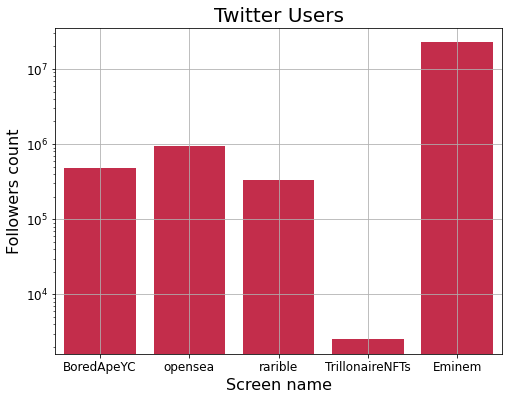

In [11]:
fig = plt.figure(figsize = (8,6))
sns.barplot(data = df_u, x = 'screen_name', y = 'followers_count',
           color = 'crimson')
plt.xlabel('Screen name', fontsize = 16)
plt.ylabel('Followers count', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Twitter Users", fontsize = 20)
plt.grid()
plt.yscale("log")
plt.show()

# User Tweets

The tweets here were collected from the Twitter timelines of a set of users.  

### Load User Tweets

The tweets are in the same database in a table called `"user_tweets"`.  We can load them with the `DB.fetch` function into a dataframe called `df_ut` (ut for user tweets).

In [11]:
#filename of database
fname_db = 'data/lecture_02'

df_ut = DB.fetch(table_name = 'user_tweets', path = fname_db)

print(f"We have {len(df_ut)} user tweets")
df_ut.sample(n=5)

We have 3402 user tweets


,created_at,screen_name,text,lang,retweet_count,reply_count,like_count,quote_count,id,author_id,conversation_id,in_reply_to_user_id,geo
644,2021-11-15T21:14:30.000Z,BoredApeYC,"Welcome to the BAYC, @PostMalone. ☠️🦍⛵️\n\nhttps://t.co/w7pL8rtcUp",en,503,186,2672,87,1460355554342227973,1381699264011771906,1460355554342227973,nan,None
2615,2021-11-02T00:08:05.000Z,rarible,@iamlirona @missingwatcher 😊,und,0,0,9,0,1455325807434371074,1160222700104757249,1455202984904863749,2898046255,None
56,2022-01-04T21:52:49.000Z,BoredApeYC,RT @crystalhefner: #NewProfilePic New Playmape in the #BAYC @BoredApeYC 🐰🍌🦍💕 https://t.co/iXpNL8tLfm,en,258,0,0,0,1478484590415302660,1381699264011771906,1478484590415302660,nan,None
731,2021-11-10T19:18:22.000Z,BoredApeYC,"RT @SuperRare: 💎Auction Announcement 💎\n\n@yugalabs have minted 2 very special pieces on SuperRare! \n\nAuctions for ""Rolling Stone x Mutant Ap…",en,92,0,0,0,1458514387803725833,1381699264011771906,1458514387803725833,nan,None
15,2022-01-08T15:45:23.000Z,BoredApeYC,RT @Mr312: how it started: how it’s going: https://t.co/WkvTEoUwd4,en,74,0,0,0,1479841674297851907,1381699264011771906,1479841674297851907,nan,None


### Group Tweets

We can group the tweets using the `groupby` function.  Once we group the tweets, we can calculate apply other functions to tweets in the group, such as `mean`.  We do this for the `retweet_count` column.

In [13]:
df_ut.groupby('screen_name').mean()



,retweet_count,reply_count,like_count,quote_count
screen_name,,,,
BoredApeYC,124.068244,9.302093,108.936306,3.618744
Eminem,5518.810526,1053.678947,37084.584211,766.400000
TrillonaireNFTs,418.285714,416.642857,454.928571,116.642857
opensea,115.584167,134.103731,179.563239,5.386715
rarible,29.650000,29.016000,74.770000,2.435000


### Barplot Retweet Count of Groups

We can make a barplot of a column value on the y-axis, and the group on the x-axis.  Seaborn knows to group together tweets in the same group, and plot the mean value along with error bars. In this case, we will plot `retweet_count` on the y-axis, and the groups are the `screen_name` column.

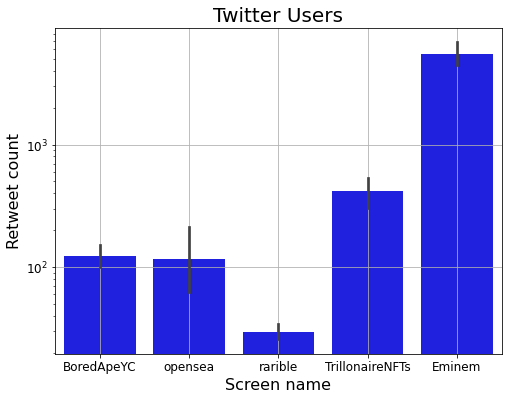

In [14]:
fig = plt.figure(figsize = (8,6))
sns.barplot(data = df_ut, x = 'screen_name', y = 'retweet_count', color = "blue")
plt.xlabel('Screen name', fontsize = 16)
plt.ylabel('Retweet count', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Twitter Users", fontsize = 20)
plt.grid()
plt.yscale("log")
plt.show()


### Subplots

We can plot two figures side by side using the `subplot` function.  You need to specify the number of rows and columns in your subplot grid, and specify which grid box the plot goes in.  It is something like this: `subplot(rows, columns, box_number)`.


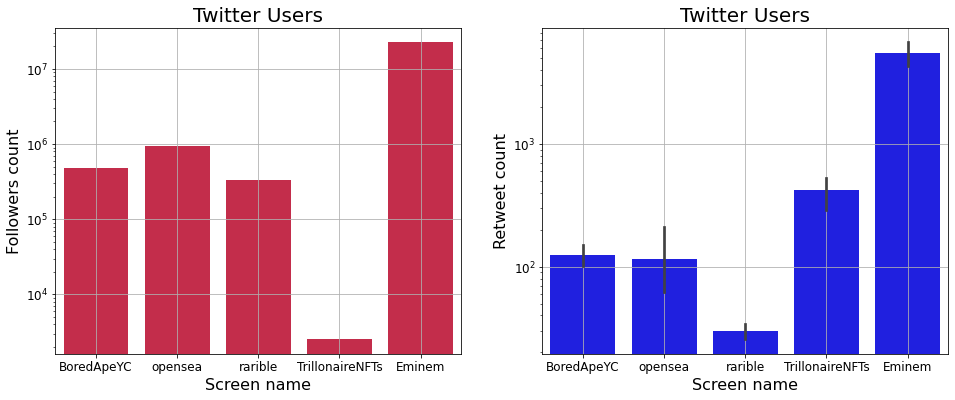

In [15]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
sns.barplot(data = df_u, x = 'screen_name', y = 'followers_count',
           color = 'crimson')
plt.xlabel('Screen name', fontsize = 16)
plt.ylabel('Followers count', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Twitter Users", fontsize = 20)
plt.grid()
plt.yscale("log")

plt.subplot(1,2,2)
sns.barplot(data = df_ut, x = 'screen_name', y = 'retweet_count', color = "blue")
plt.xlabel('Screen name', fontsize = 16)
plt.ylabel('Retweet count', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Twitter Users", fontsize = 20)
plt.grid()
plt.yscale("log")



plt.show()

### Compare Tweets Containing Different Keywords

We can compare the retweet count of tweets that contain a keyword versus those that do not.  We do this by adding a column to the dataframe called `has_keyword` that is `True` if the tweet has the word.  We can then plot the tweets grouped by screen name, and separate within the group those where `has_keyword` is `True` and `False`.  We use the `hue` parameter for this in-group separation.

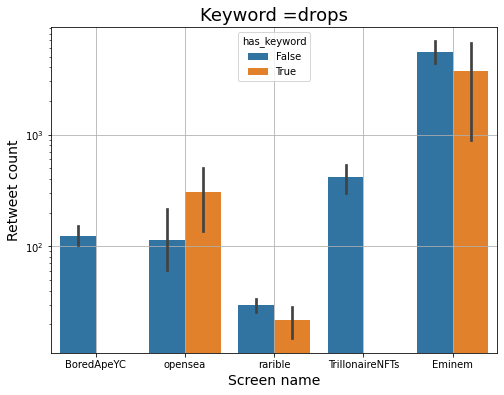

In [16]:
keyword = 'drops'

df_ut['has_keyword'] = df_ut.text.str.contains(keyword, case = False)

fig = plt.figure(figsize = (8,6))
sns.barplot(data = df_ut, x = 'screen_name', y = 'retweet_count',
                hue = 'has_keyword')
plt.xlabel('Screen name',fontsize  = 14)
plt.ylabel('Retweet count',fontsize  = 14)
plt.title(f"Keyword ={keyword}",fontsize = 18)
plt.yscale('log')
plt.grid()
plt.show()

### Describe Groups

We can group the tweets by `screen_name` and `has_keyword` using the `groupby` function.  Then we can summarize the statistics of the groups in a dataframe by using the `describe` function.

In [17]:
print(f"Keyword is {keyword}")
df_ut.groupby(['screen_name','has_keyword'])[['retweet_count']].describe()

Keyword is drops


retweet_count                                   \
                                    count         mean          std    min   
screen_name     has_keyword                                                  
BoredApeYC      False              1099.0   124.068244   415.553516    0.0   
Eminem          False               188.0  5537.675532  8692.083925  392.0   
                True                  2.0  3745.500000  4024.144692  900.0   
TrillonaireNFTs False                14.0   418.285714   236.813925    2.0   
opensea         False              1085.0   113.103226  1546.156799    0.0   
                True                 14.0   307.857143   367.119108    1.0   
rarible         False               985.0    29.768528    67.400176    0.0   
                True                 15.0    21.866667    13.922575    0.0   

                                                                
                                 25%     50%      75%      max  
screen_name     has_keyword                                     
BoredApeYC      False          15.00    28.0    69.00   6213.0  
Eminem          False        1496.75  2648.5  5184.75  68467.0  
                True         2322.75  3745.5  5168.25   6591.0  
TrillonaireNFTs False         232.00   441.0   572.00    731.0  
opensea         False          15.00    33.0    63.00  50789.0  
                True           37.00   107.5   614.75   1063.0  
rarible         False           5.00    13.0    29.00   1008.0  
                True           15.00    25.0    27.00     48.0

# Save Notebook to HTML

This last line will let you save the notebook and all of its outputs to an HTML file.  You can download this file to your computer from Colab and then print it to a PDF using ctrl+P.

In [2]:
!juptyer nbconvert -html Lecture02_BasicSocialMediaDataAnalysis.ipynb

'juptyer' is not recognized as an internal or external command,
operable program or batch file.
